Welcome to the Maze Program!
Please select a action 
1. Solve a maze
2. Draw a graph
3. Exit
Enter the action number (1-3):1
Please select a maze type:
1. Rectangle Maze
2. Circle Maze
3. Triangle Maze
4. Hexagonal Maze
Enter the maze type (1-4): 3
Available images in the triangle folder:
['400_370_210_255.png']
Enter the number of the image to use: 1
Selected image: 400_370_210_255.png
Optimum route found.
TOTAL TIME TAKEN TO COMPLETELY SOLVE THE MAZE :  0.5498161315917969 seconds
Do you want to continue (Y/N)? n


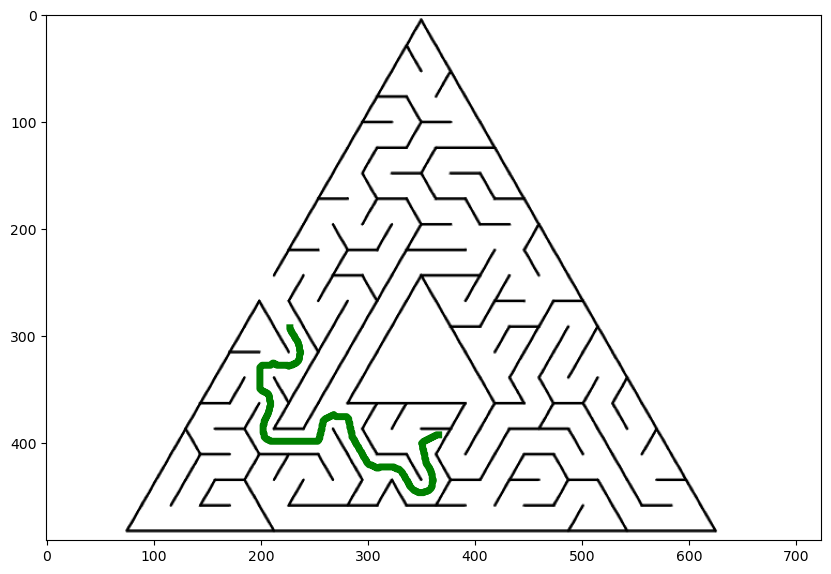

In [1]:
# Import any necessary libraries/modules
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import time
from skimage.morphology import skeletonize

def rectangle_maze(filename):
    print(filename)
    img = cv2.imread('DATASETS/RECTANGLE/'+filename)
    starttime=time.time()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV) 
    cv2.imwrite(filename+'/1. Threshold1.jpg', thresh)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    dc = cv2.drawContours(thresh, contours, 0, (255, 255, 255), 5)
    cv2.imwrite(filename+'/2. Contours1.jpg', dc)
    dc = cv2.drawContours(dc, contours, 1, (0,0,0) , 5)
    cv2.imwrite(filename+'/3. Contours2.jpg', dc)
    ret, thresh = cv2.threshold(dc, 240, 255, cv2.THRESH_BINARY)
    cv2.imwrite(filename+'/4. Threshold2.jpg', thresh)
    ke = 19
    kernel = np.ones((ke, ke), np.uint8)
    dilation = cv2.dilate(thresh, kernel, iterations=1)
    cv2.imwrite(filename+'/5. Dilation.jpg', dilation)
    erosion = cv2.erode(dilation, kernel, iterations=1)
    cv2.imwrite(filename+'/6. Erosion.jpg', erosion)
    diff = cv2.absdiff(dilation, erosion)
    cv2.imwrite(filename+'/7. Difference.jpg', diff)
    b, g, r = cv2.split(img)
    mask_inv = cv2.bitwise_not(diff)
    cv2.imwrite(filename+'/8. Mask.jpg', mask_inv)
    r = cv2.bitwise_and(r, r, mask=mask_inv)
    b = cv2.bitwise_and(b, b, mask=mask_inv)
    res = cv2.merge((b, g, r))
    cv2.imwrite(filename+'/9. SolvedMaze.jpg', res)
    endtime=time.time()
    plt.figure(figsize=(14,14))
    plt.imshow(res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    timetaken1=endtime-starttime
    print("TOTAL TIME TAKEN TO COMPLETELY SOLVE THE MAZE : " , timetaken1 , "seconds")

def circular_maze(filename1):
    starttime=time.time()
    rgb_img = plt.imread('DATASETS/CIRCLE/'+filename1)
    base_name, extension = os.path.splitext(filename1)
    x0, y0, x1, y1 = base_name.split("_")
    x0 = int(x0)
    y0 = int(y0)
    x1 = int(x1)
    y1 = int(y1)
    path_length=0
    if rgb_img.shape.__len__()>2:
        thr_img = rgb_img[:,:,0] > np.max(rgb_img[:,:,0])/2
    else:
        thr_img = rgb_img > np.max(rgb_img)/2
    skeleton = skeletonize(thr_img)
    mapT = ~skeleton
    _mapt = np.copy(mapT)
    boxr = 40
    if y1 < boxr: y1 = boxr
    if x1 < boxr: x1 = boxr
    cpys, cpxs = np.where(_mapt[y1-boxr:y1+boxr, x1-boxr:x1+boxr]==0)
    cpys += y1-boxr
    cpxs += x1-boxr
    idx = np.argmin(np.sqrt((cpys-y1)**2 + (cpxs-x1)**2))
    y, x = cpys[idx], cpxs[idx]
    pts_x = [x]
    pts_y = [y]
    pts_c = [0]
    xmesh, ymesh = np.meshgrid(np.arange(-1,2),np.arange(-1,2))
    ymesh = ymesh.reshape(-1)
    xmesh = xmesh.reshape(-1)
    dst = np.zeros((thr_img.shape))
    while(True):
        idc = np.argmin(pts_c)
        ct = pts_c.pop(idc)
        x = pts_x.pop(idc)
        y = pts_y.pop(idc)
        ys,xs = np.where(_mapt[y-1:y+2,x-1:x+2] == 0)
        _mapt[ys+y-1, xs+x-1] = ct
        _mapt[y,x] = 9999999
        dst[ys+y-1,xs+x-1] = ct+1
        pts_x.extend(xs+x-1)
        pts_y.extend(ys+y-1)
        pts_c.extend([ct+1]*xs.shape[0])
        if pts_x == []:
            break
        if np.sqrt((x-x0)**2 + (y-y0)**2) <boxr:
            edx = x
            edy = y
            break
    path_x = []
    path_y = [] 
    y = edy
    x = edx
    while(True):
        nbh = dst[y-1:y+2,x-1:x+2]
        nbh[1,1] = 9999999
        nbh[nbh==0] = 9999999
        if np.min(nbh) == 9999999:
            break
        idx = np.argmin(nbh)
        y += ymesh[idx]
        x += xmesh[idx]
        if np.sqrt((x-x1)**2 + (y-y1)**2) < boxr:
            print('Optimum route found.')
            break
        path_y.append(y)
        path_x.append(x)
        path_length+=1
    endtime=time.time()
    plt.figure(figsize=(10,10))
    plt.imshow(rgb_img)
    plt.plot(path_x,path_y, 'g-', linewidth=5)
    timetaken2=endtime-starttime
    print("TOTAL TIME TAKEN TO COMPLETELY SOLVE THE MAZE : " , timetaken2 , "seconds")
    print("PATH LENGTH",path_length)

def triangle_maze(filename2):
    starttime=time.time()
    rgb_img = plt.imread('DATASETS/TRIANGLE/'+filename2)
    base_name, extension = os.path.splitext(filename2)
    x0, y0, x1, y1 = base_name.split("_")
    x0 = int(x0)
    y0 = int(y0)
    x1 = int(x1)
    y1 = int(y1)
    path_length=0
    if rgb_img.shape.__len__()>2:
        thr_img = rgb_img[:,:,0] > np.max(rgb_img[:,:,0])/2
    else:
        thr_img = rgb_img > np.max(rgb_img)/2
    skeleton = skeletonize(thr_img)
    mapT = ~skeleton
    _mapt = np.copy(mapT)
    boxr = 40
    if y1 < boxr: y1 = boxr
    if x1 < boxr: x1 = boxr
    cpys, cpxs = np.where(_mapt[y1-boxr:y1+boxr, x1-boxr:x1+boxr]==0)
    cpys += y1-boxr
    cpxs += x1-boxr
    idx = np.argmin(np.sqrt((cpys-y1)**2 + (cpxs-x1)**2))
    y, x = cpys[idx], cpxs[idx]
    pts_x = [x]
    pts_y = [y]
    pts_c = [0]
    xmesh, ymesh = np.meshgrid(np.arange(-1,2),np.arange(-1,2))
    ymesh = ymesh.reshape(-1)
    xmesh = xmesh.reshape(-1)
    dst = np.zeros((thr_img.shape))
    while(True):
        idc = np.argmin(pts_c)
        ct = pts_c.pop(idc)
        x = pts_x.pop(idc)
        y = pts_y.pop(idc)
        ys,xs = np.where(_mapt[y-1:y+2,x-1:x+2] == 0)
        _mapt[ys+y-1, xs+x-1] = ct
        _mapt[y,x] = 9999999
        dst[ys+y-1,xs+x-1] = ct+1
        pts_x.extend(xs+x-1)
        pts_y.extend(ys+y-1)
        pts_c.extend([ct+1]*xs.shape[0])
        if pts_x == []:
            break
        if np.sqrt((x-x0)**2 + (y-y0)**2) <boxr:
            edx = x
            edy = y
            break
    path_x = []
    path_y = [] 
    y = edy
    x = edx
    while(True):
        nbh = dst[y-1:y+2,x-1:x+2]
        nbh[1,1] = 9999999
        nbh[nbh==0] = 9999999
        if np.min(nbh) == 9999999:
            break
        idx = np.argmin(nbh)
        y += ymesh[idx]
        x += xmesh[idx]
        if np.sqrt((x-x1)**2 + (y-y1)**2) < boxr:
            print('Optimum route found.')
            break
        path_y.append(y)
        path_x.append(x)
    endtime=time.time()
    plt.figure(figsize=(10,10))
    plt.imshow(rgb_img)
    plt.plot(path_x,path_y, 'g-', linewidth=5)
    timetaken2=endtime-starttime
    print("TOTAL TIME TAKEN TO COMPLETELY SOLVE THE MAZE : " , timetaken2 , "seconds")

def hexagon_maze(filename3):
    starttime=time.time()
    rgb_img = plt.imread('DATASETS/HEXAGONAL/'+filename3)
    base_name, extension = os.path.splitext(filename3)
    x0, y0, x1, y1 = base_name.split("_")
    x0 = int(x0)
    y0 = int(y0)
    x1 = int(x1)
    y1 = int(y1)
    if rgb_img.shape.__len__()>2:
        thr_img = rgb_img[:,:,0] > np.max(rgb_img[:,:,0])/2
    else:
        thr_img = rgb_img > np.max(rgb_img)/2
    skeleton = skeletonize(thr_img)
    mapT = ~skeleton
    _mapt = np.copy(mapT)
    boxr = 40
    if y1 < boxr: y1 = boxr
    if x1 < boxr: x1 = boxr
    cpys, cpxs = np.where(_mapt[y1-boxr:y1+boxr, x1-boxr:x1+boxr]==0)
    cpys += y1-boxr
    cpxs += x1-boxr
    idx = np.argmin(np.sqrt((cpys-y1)**2 + (cpxs-x1)**2))
    y, x = cpys[idx], cpxs[idx]
    pts_x = [x]
    pts_y = [y]
    pts_c = [0]
    xmesh, ymesh = np.meshgrid(np.arange(-1,2),np.arange(-1,2))
    ymesh = ymesh.reshape(-1)
    xmesh = xmesh.reshape(-1)
    dst = np.zeros((thr_img.shape))
    while(True):
        idc = np.argmin(pts_c)
        ct = pts_c.pop(idc)
        x = pts_x.pop(idc)
        y = pts_y.pop(idc)
        ys,xs = np.where(_mapt[y-1:y+2,x-1:x+2] == 0)
        _mapt[ys+y-1, xs+x-1] = ct
        _mapt[y,x] = 9999999
        dst[ys+y-1,xs+x-1] = ct+1
        pts_x.extend(xs+x-1)
        pts_y.extend(ys+y-1)
        pts_c.extend([ct+1]*xs.shape[0])
        if pts_x == []:
            break
        if np.sqrt((x-x0)**2 + (y-y0)**2) <boxr:
            edx = x
            edy = y
            break
    path_x = []
    path_y = [] 
    y = edy
    x = edx
    while(True):
        nbh = dst[y-1:y+2,x-1:x+2]
        nbh[1,1] = 9999999
        nbh[nbh==0] = 9999999
        if np.min(nbh) == 9999999:
            break
        idx = np.argmin(nbh)
        y += ymesh[idx]
        x += xmesh[idx]
        if np.sqrt((x-x1)**2 + (y-y1)**2) < boxr:
            print('Optimum route found.')
            break
        path_y.append(y)
        path_x.append(x)
    endtime=time.time()
    plt.figure(figsize=(10,10))
    plt.imshow(rgb_img)
    plt.plot(path_x,path_y, 'g-', linewidth=5)
    timetaken2=endtime-starttime
    print("TOTAL TIME TAKEN TO COMPLETELY SOLVE THE MAZE : " , timetaken2 , "seconds")

def graph():
    data = {'rectangular': timetaken1, 'circular': timetaken2, 'triangle': timetaken3, 'hexagonal':timetaken4 }
    maze = list(data.keys())
    time = list(data.values())
  
    fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
    plt.bar(maze, time, color ='maroon',width = 0.4)
 
    plt.xlabel("DIFFERENT MAZES")
    plt.ylabel("TIME TAKEN TO SOLVE THIS MAZES")
    plt.title("CHECKING THE RELATIOSHIP AND COMPLEXITY")
    plt.show()

# Main program
def main():
    # Prompt the user to select a maze type
    continue_execution=True
    while continue_execution:
        print("Welcome to the Maze Program!")
        print("Please select a action ")
        print("1. Solve a maze")
        print("2. Draw a graph")
        print("3. Exit")
        action=int(input("Enter the action number (1-3):"))
        if action==1:    
            print("Please select a maze type:")
            print("1. Rectangle Maze")
            print("2. Circle Maze")
            print("3. Triangle Maze")
            print("4. Hexagonal Maze")

            maze_type = int(input("Enter the maze type (1-4): "))

            # Execute the corresponding function based on the selected maze type
            if maze_type == 1:
                rectangle_folder = 'DATASETS/RECTANGLE'
                images = os.listdir(rectangle_folder)
                available_images = []
                print("Available images in the rectangle folder:")
                for i, image in enumerate(images):
                    available_images.append(image)
                print(available_images) 
                image_choice = int(input("Enter the number of the image to use: "))
                if 1 <= image_choice <= len(available_images):
                    selected_image = available_images[image_choice - 1]
                    print(f"Selected image: {selected_image}")
                # Pass the selected_image variable to the corresponding maze function
                    rectangle_maze(selected_image)
                else:
                    print("Invalid image choice.")  
            elif maze_type == 2:
                circle_folder = 'DATASETS/CIRCLE'
                images = os.listdir(circle_folder)
                available_images = []
                print("Available images in the circle folder:")
                for i, image in enumerate(images):
                    available_images.append(image)
                print(available_images) 
                image_choice = int(input("Enter the number of the image to use: "))
                if 1 <= image_choice <= len(available_images):
                    selected_image = available_images[image_choice - 1]
                    print(f"Selected image: {selected_image}")
                # Pass the selected_image variable to the corresponding maze function
                    circular_maze(selected_image)
                else:
                    print("Invalid image choice.")
            elif maze_type == 3:
                triangle_folder = 'DATASETS/TRIANGLE'
                images = os.listdir(triangle_folder)
                available_images = []
                print("Available images in the triangle folder:")
                for i, image in enumerate(images):
                    available_images.append(image)
                print(available_images) 
                image_choice = int(input("Enter the number of the image to use: "))
                if 1 <= image_choice <= len(available_images):
                    selected_image = available_images[image_choice - 1]
                    print(f"Selected image: {selected_image}")
                # Pass the selected_image variable to the corresponding maze function
                    triangle_maze(selected_image)
                else:
                    print("Invalid image choice.")
            elif maze_type == 4:
                hexagon_folder = 'DATASETS/HEXAGONAL'
                images = os.listdir(hexagon_folder)
                available_images = []
                print("Available images in the hexagon folder:")
                for i, image in enumerate(images):
                    available_images.append(image)
                print(available_images) 
                image_choice = int(input("Enter the number of the image to use: "))
                if 1 <= image_choice <= len(available_images):
                    selected_image = available_images[image_choice - 1]
                    print(f"Selected image: {selected_image}")
                # Pass the selected_image variable to the corresponding maze function
                    hexagon_maze(selected_image)
                else:
                    print("Invalid image choice.")
            else:
                print("Invalid maze type!")
        choice = input("Do you want to continue (Y/N)? ")
        if choice.lower() != 'y':
            continue_execution = False
        elif action==2:
            continue_execution = False
        else:
            print("Invalid action")


            
# Call the main function to start the program
if __name__ == '__main__':
    main()